In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import unet
from unet import utils
from unet.datasets import circles

import os
import sys
import numpy as np

sys.path.append("../vsegmenter")

from vsegmenter import cfg
from vsegmenter.data import dataset
import random
from matplotlib import pyplot as plt
import tensorflow as tf
from unet import custom_objects


In [9]:
model_file = cfg.results("segmenter_v1.model")
unet_model = tf.keras.models.load_model(model_file, custom_objects = custom_objects)

In [10]:
from model.test_circles import get_datasets

# train_dataset, validation_dataset = circles.load_data(100, nx=200, ny=200, splits=(0.7, 0.3))
train_dataset, validation_dataset = get_datasets()

Number of train samples: 400, test samples = 100
Sample dimensions: sample: (128, 128, 3) label (mask): (128, 128, 2)
Original image shape : (400, 128, 128, 3)


In [52]:
num_predictions = 10
x_test = validation_dataset.batch(batch_size=num_predictions).shuffle(10)

x_test = x_test.take(1)
prediction = unet_model.predict(list(x_test)[0])
print(f"prediction shape = {prediction.shape}")
print(f"prediction x_test = {len(list(x_test)) }")


ValueError: in user code:

    File "/media/gus/workspace/wpy/venvs/basictf/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/media/gus/workspace/wpy/venvs/basictf/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/media/gus/workspace/wpy/venvs/basictf/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/media/gus/workspace/wpy/venvs/basictf/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/media/gus/workspace/wpy/venvs/basictf/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/media/gus/workspace/wpy/venvs/basictf/lib/python3.8/site-packages/keras/engine/input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "unet" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 128, 128, 3) dtype=float16>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 128, 128, 2) dtype=uint8>]


In [50]:
list(x_test)[0][0].shape
list(x_test)[0][1].shape

TensorShape([10, 128, 128, 2])

In [ ]:
def show_predictions(num_preds=10):

    for i in range(num_preds):
        idx = random.randrange(0, len(x_test))
        im1 = x_test[idx]
        mask1 = y_test[idx]
#         y_pred = create_mask(model.predict(im1[tf.newaxis, ...]))
        y_pred = create_binary(model.predict(im1[tf.newaxis, ...])[0])

        display((im1, mask1, y_pred))

In [61]:
num_images=20
# extraer un array de imágenes del conjunto de validación
validation_images = []
validation_labels = []
for image, label in validation_dataset.take(num_images):
    validation_images.append(image.numpy())
    validation_labels.append(label.numpy())
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

# hacer las predicciones para las imágenes seleccionadas
prediction = unet_model.predict(validation_images)

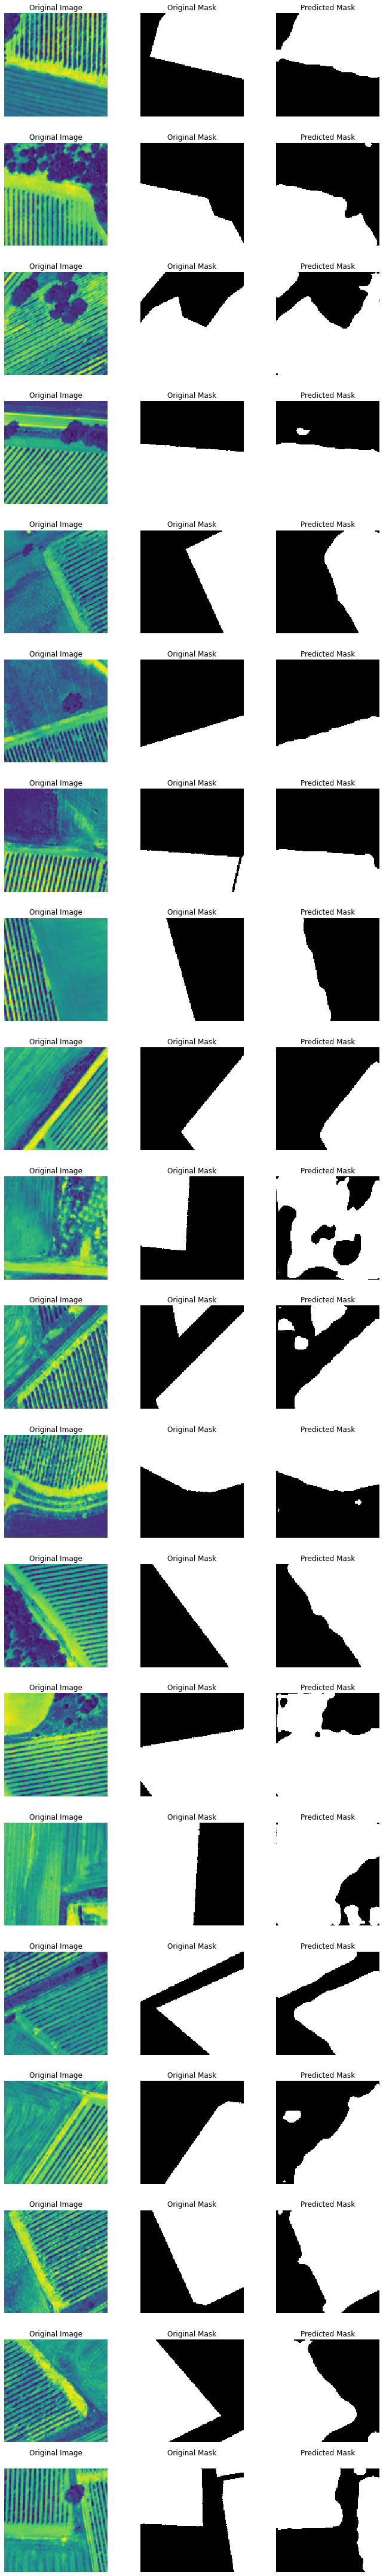

In [68]:
# crear la figura para mostrar las imágenes
fig, ax = plt.subplots(num_images, 3, sharex=True, sharey=True, figsize=(10,int(num_images*3)))

# iterar sobre las imágenes seleccionadas y mostrar las imágenes y las máscaras originales y predichas
for i in range(num_images):
    ax[i][0].matshow(validation_images[i][..., -1]); ax[i][0].set_title('Original Image'); ax[i][0].axis('off')
    ax[i][1].matshow(np.argmax(validation_labels[i], axis=-1), cmap=plt.cm.gray); ax[i][1].set_title('Original Mask'); ax[i][1].axis('off')
    ax[i][2].matshow(np.argmax(prediction[i,...], axis=-1), cmap=plt.cm.gray); ax[i][2].set_title('Predicted Mask'); ax[i][2].axis('off')

# ajustar el diseño de las imágenes en la figura
plt.tight_layout()